In [1]:
import os
import glob
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
sns.set_theme(style="whitegrid")

pd.options.display.max_rows = 200

os.chdir('<project-dir>')

outdir = 'results/hg38/eqtl_sgls/sgls_summary/regular/'

os.makedirs(outdir, exist_ok=True)

## Load all SGL Data


In [4]:
#fns = glob.glob('results/hg38/finemapping/sgls/*/Naive_B_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1.5000.finemap_sgls.tsv')
fns = glob.glob('results/hg38/eqtl_sgls/*/*.5000.eqtl_sgls.tsv')

In [5]:
all_data = []
for fn in fns:
    
    # split meta information
    info = fn.split('/')

    genome = info[1]
    ec_dataset_id = info[3]
    sample = info[4].rsplit('.', maxsplit=3)[0]

    # load sgl table
    tdf = pd.read_table(fn)
    tdf.loc[:, 'ec_dataset_id'] = ec_dataset_id
    tdf.loc[:, 'sample'] = sample

    # append to all
    all_data.append(tdf)

all_df = pd.concat(all_data)
all_df.rename(columns={'-log10_qval': '-log10_qval_loop'}, inplace=True)

In [6]:
all_df.head(3)

,loop_chrA,loop_startA,loop_endA,loop_chrB,loop_startB,loop_endB,-log10_qval_loop,snp_chrom,snp_start,snp_end,...,z,cs_min_r2,region,gene_start,gene_end,gene_strand,gene_type,gene_name,ec_dataset_id,sample
0,1,2555000,2560000,1,2575000,2580000,13.075867,1,2575048,2575049,...,6.207278,0.674609,chr1:1555639-3555639,2555639.0,2565382.0,+,gene,TNFRSF14,QTD000056,Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H...
1,1,2555000,2560000,1,2575000,2580000,13.075867,1,2579840,2579841,...,6.101790,0.674609,chr1:1555639-3555639,2555639.0,2565382.0,+,gene,TNFRSF14,QTD000056,Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H...
2,1,2555000,2560000,1,2580000,2585000,11.060238,1,2580533,2580534,...,5.889528,0.674609,chr1:1555639-3555639,2555639.0,2565382.0,+,gene,TNFRSF14,QTD000056,Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H...


In [7]:
def rev_coord(x):
    r = x.split('_')
    r = reversed(r)
    r = '_'.join(r)
    return(r)
coords_dict = {x: rev_coord(x) for x in ['loop_chrA',
                                'loop_startA',
                                'loop_endA',
                                'loop_chrB',
                                'loop_startB',
                                'loop_endB',
                                'snp_chrom',
                                'snp_start',
                                'snp_end',
                                'gene_chrom',
                                'tss_start',
                                'tss_end',
                                'gene_start',
                                'gene_end']}
coords_dict.update({'gene_id': 'geneid'})
all_df.rename(columns=coords_dict, inplace=True)

In [8]:
all_df.head()

,chrA_loop,startA_loop,endA_loop,chrB_loop,startB_loop,endB_loop,-log10_qval_loop,chrom_snp,start_snp,end_snp,...,z,cs_min_r2,region,start_gene,end_gene,gene_strand,gene_type,gene_name,ec_dataset_id,sample
0,1,2555000,2560000,1,2575000,2580000,13.075867,1,2575048,2575049,...,6.207278,0.674609,chr1:1555639-3555639,2555639.0,2565382.0,+,gene,TNFRSF14,QTD000056,Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H...
1,1,2555000,2560000,1,2575000,2580000,13.075867,1,2579840,2579841,...,6.101790,0.674609,chr1:1555639-3555639,2555639.0,2565382.0,+,gene,TNFRSF14,QTD000056,Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H...
2,1,2555000,2560000,1,2580000,2585000,11.060238,1,2580533,2580534,...,5.889528,0.674609,chr1:1555639-3555639,2555639.0,2565382.0,+,gene,TNFRSF14,QTD000056,Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H...
3,1,2555000,2560000,1,2580000,2585000,11.060238,1,2580533,2580534,...,5.889528,0.674609,chr1:1555639-3555639,2555639.0,2565382.0,+,gene,TNFRSF14,QTD000056,Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H...
4,1,2555000,2560000,1,2580000,2585000,11.060238,1,2581012,2581013,...,6.004181,0.674609,chr1:1555639-3555639,2555639.0,2565382.0,+,gene,TNFRSF14,QTD000056,Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H...


In [9]:
# add snp position
all_df['snp_pos'] = all_df['chrA_loop'].astype(str) + ':' + all_df['end_snp'].astype(str)

In [10]:
all_df.head()

,chrA_loop,startA_loop,endA_loop,chrB_loop,startB_loop,endB_loop,-log10_qval_loop,chrom_snp,start_snp,end_snp,...,cs_min_r2,region,start_gene,end_gene,gene_strand,gene_type,gene_name,ec_dataset_id,sample,snp_pos
0,1,2555000,2560000,1,2575000,2580000,13.075867,1,2575048,2575049,...,0.674609,chr1:1555639-3555639,2555639.0,2565382.0,+,gene,TNFRSF14,QTD000056,Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H...,1:2575049
1,1,2555000,2560000,1,2575000,2580000,13.075867,1,2579840,2579841,...,0.674609,chr1:1555639-3555639,2555639.0,2565382.0,+,gene,TNFRSF14,QTD000056,Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H...,1:2579841
2,1,2555000,2560000,1,2580000,2585000,11.060238,1,2580533,2580534,...,0.674609,chr1:1555639-3555639,2555639.0,2565382.0,+,gene,TNFRSF14,QTD000056,Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H...,1:2580534
3,1,2555000,2560000,1,2580000,2585000,11.060238,1,2580533,2580534,...,0.674609,chr1:1555639-3555639,2555639.0,2565382.0,+,gene,TNFRSF14,QTD000056,Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H...,1:2580534
4,1,2555000,2560000,1,2580000,2585000,11.060238,1,2581012,2581013,...,0.674609,chr1:1555639-3555639,2555639.0,2565382.0,+,gene,TNFRSF14,QTD000056,Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H...,1:2581013


## Add metadata

In [11]:
metadata = pd.read_table('results/hg38/eqtl/eqtl_catalogue/dataset_metadata.with-links.tsv')
metadata = metadata.loc[metadata.quant_method == 'ge']
metadata = metadata.loc[metadata.dataset_id.isin(all_df.ec_dataset_id.unique())]

In [12]:
def get_ec_dataset_name(sr):
    study_label = sr['study_label'].replace('_', ' ')
    sample_group = sr['sample_group'].replace('_', ' ')
    tissue = sr['tissue_label']
    name = '{} - {} - {}'.format(study_label, sample_group, tissue)
    name = '{}'.format(tissue) # temporary

    return(name)
metadata.loc[:, 'ec_dataset_name'] = metadata.apply(get_ec_dataset_name, axis=1)

In [13]:
all_df = all_df.merge(metadata, left_on='ec_dataset_id', right_on='dataset_id')
all_df.loc[:, 'ec_fullname'] = all_df.apply(lambda sr: f'{sr.ec_dataset_name} ({sr.ec_dataset_id})', axis=1)

#### Mini-summary of SGLs

In [14]:
# count the samples
num_samples = all_df['sample'].nunique()
print('Number of samples with SGLs:', num_samples)

# count the total number of sgl events across all studies
print('Number of SGL events:', all_df.shape[0]) 

# count the total number of eqtls
uniq_eqtl_df = all_df.drop_duplicates(subset=['snp_pos', 'geneid'])
print('Number of unique eqtls:', uniq_eqtl_df.shape[0])

# count the unique snps
num_uniq_snps = (all_df['chrA_loop'].astype(str) + '-' + all_df['end_snp'].astype(str)).nunique()
print('Number of unique snps:', num_uniq_snps)

# count the unique genes
num_uniq_genes = all_df.geneid.nunique()
print('Number of unique genes:', num_uniq_genes)

# count the unique loops
uniq_loops_df = all_df.drop_duplicates(subset=['chrA_loop', 'startA_loop', 'chrB_loop', 'startB_loop'])
print('Number of unique loops:', uniq_loops_df.shape[0])

# count the total number of sgls
uniq_sgls_df = all_df.drop_duplicates(subset=['chrA_loop', 'startA_loop', 'chrB_loop', 'startB_loop', 'snp_pos', 'geneid'])
print('Number of unique sgls:', uniq_sgls_df.shape[0])

Number of samples with SGLs: 73
Number of SGL events: 345077
Number of unique eqtls: 66115
Number of unique snps: 59396
Number of unique genes: 4697
Number of unique loops: 15491
Number of unique sgls: 67401


#### Mini-summary of eQTLs

In [15]:
def is_snp(x):
    s = x.split('_')
    if (len(s[-2]) == 1) and (len(s[-1]) == 1):
        return(True)
    else:
        return(False) 

In [16]:
template = 'results/hg38/eqtl/eqtl_catalogue/{}.credible_sets.tsv.gz'
num_snps_study_mesh = []
for i, sr in metadata.iterrows():

    ec_dataset_id = sr['dataset_id']
    ec_dataset_name = sr['ec_dataset_name']
    
    tdf = pd.read_table(template.format(ec_dataset_id))
    tdf = tdf.loc[tdf.variant.apply(is_snp)]
    
    num_snps = tdf.variant.nunique()
    num_genes = tdf.gene_id.nunique()
    
    num_snps_study_mesh.append([ec_dataset_id, ec_dataset_name, tdf.shape[0], num_snps, num_genes])

In [17]:
num_snps_study_mesh = pd.DataFrame(num_snps_study_mesh)
num_snps_study_mesh.columns = ['ec_dataset_id', 'ec_dataset_name', 'num_total_eqtls', 'num_total_snps', 'num_total_genes']
num_snps_study_mesh.set_index('ec_dataset_name', inplace=True)

In [18]:
num_snps_study_mesh

,ec_dataset_id,num_total_eqtls,num_total_snps,num_total_genes
ec_dataset_name,,,,
monocyte,QTD000021,217666,181581,5638
CD4+ T cell,QTD000031,208155,162540,5036
LCL,QTD000056,38581,31875,1236
LCL,QTD000095,93544,78013,2224
LCL,QTD000110,115953,96874,4348
LCL,QTD000221,54160,43019,1647
monocyte,QTD000409,85764,74890,4068
B cell,QTD000474,60629,53994,1792
CD4+ T cell,QTD000479,64386,56469,2038


Looking into the average distance

In [19]:
dist = (all_df.startB_loop - all_df.startA_loop)

In [20]:
dist.describe().astype(int)

count    345077
mean      69323
std       76858
min       20000
25%       25000
50%       45000
75%       80000
max      995000
dtype: int64

<Axes: ylabel='Frequency'>

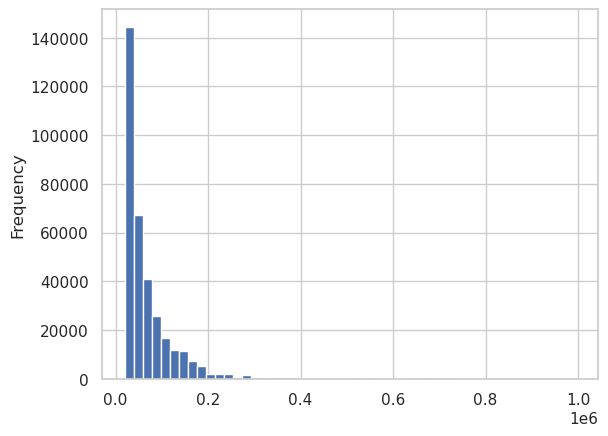

In [21]:
dist.plot(kind='hist', bins=50)

## Overview of SGLs Across Each Study

### Count the number of sgls per GWAS Study

I would expect that, in general, that studies with more snps will have more SGLs.

In [22]:
grps = all_df.groupby(['ec_dataset_name'])
counts = grps['chrA_loop'].count().to_frame()
counts.columns = ['num_sgls']

In [23]:
counts.sort_values(['num_sgls'], ascending=[True])

,num_sgls
ec_dataset_name,
B cell,7322
CD8+ T cell,7697
NK cell,11969
CD16+ monocyte,30593
LCL,46543
CD4+ T cell,47469
monocyte,193484


In [24]:
counts.describe()

,num_sgls
count,7.000000
mean,49296.714286
std,65874.244959
min,7322.000000
25%,9833.000000
50%,30593.000000
75%,47006.000000
max,193484.000000


### Count and plot the number of sgls, snps and genes per ec dataset

In [25]:
uniq_sgls_mesh_df = all_df.drop_duplicates(subset=['chrA_loop', 'startA_loop', 'chrB_loop', 'startB_loop', 'snp_pos', 'geneid', 'ec_dataset_name'])
uniq_sgls_mesh_df['loop_id'] = uniq_sgls_mesh_df['chrA_loop'].astype(str) + ':' \
                            + uniq_sgls_mesh_df['startA_loop'].astype(str) + '--' \
                            + uniq_sgls_mesh_df['chrB_loop'].astype(str) + ':' \
                            + uniq_sgls_mesh_df['startB_loop'].astype(str)

mesh_sgl_grps = uniq_sgls_mesh_df.groupby(['ec_dataset_name'])
sgl_counts = mesh_sgl_grps['loop_id'].count().to_frame()
sgl_counts.columns = ['num_sgls']
sgl_counts.sort_values('num_sgls', ascending=False)

/mnt/BioHome/jreyna/tmp/ipykernel_3151440/2840405829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniq_sgls_mesh_df['loop_id'] = uniq_sgls_mesh_df['chrA_loop'].astype(str) + ':' \


,num_sgls
ec_dataset_name,
monocyte,37906
LCL,15141
CD4+ T cell,10634
CD16+ monocyte,7041
NK cell,3826
B cell,3117
CD8+ T cell,2804


In [26]:
# number of unique genes per ec dataset
mesh_gene_grps = uniq_sgls_mesh_df.drop_duplicates(['geneid', 'ec_dataset_name']).groupby(['ec_dataset_name'])
gene_counts = mesh_gene_grps['loop_id'].count().to_frame()
gene_counts.columns = ['num_genes']
gene_counts.sort_values('num_genes', ascending=False)

,num_genes
ec_dataset_name,
monocyte,3152
LCL,1324
CD4+ T cell,1193
CD16+ monocyte,690
NK cell,380
CD8+ T cell,351
B cell,305


In [27]:
# number of unique snps per ec dataset
mesh_snp_grps = uniq_sgls_mesh_df.drop_duplicates(['snp_pos', 'ec_dataset_name']).groupby(['ec_dataset_name'])
snp_counts = mesh_snp_grps['loop_id'].count().to_frame()
snp_counts.columns = ['num_snps']
snp_counts.sort_values('num_snps', ascending=False)

,num_snps
ec_dataset_name,
monocyte,34935
LCL,13018
CD4+ T cell,9737
CD16+ monocyte,6852
NK cell,3793
B cell,3072
CD8+ T cell,2719


In [28]:
combine_uniq_mesh_counts = pd.concat([num_snps_study_mesh[['ec_dataset_id', 'num_total_eqtls']],
                                      num_snps_study_mesh[['num_total_snps']],
                                      num_snps_study_mesh[['num_total_genes']]], axis=1)

combine_nums = pd.concat([snp_counts, sgl_counts, gene_counts], axis=1)
combine_uniq_mesh_counts = combine_uniq_mesh_counts.merge(combine_nums, left_index=True, right_index=True)

combine_uniq_mesh_counts.columns = ['ec_dataset_id', 'num_total_eqtls', 'num_total_snps', 'num_total_genes', 'num_snps', 'num_sgls', 'num_genes']
combine_uniq_mesh_counts

,ec_dataset_id,num_total_eqtls,num_total_snps,num_total_genes,num_snps,num_sgls,num_genes
ec_dataset_name,,,,,,,
B cell,QTD000474,60629,53994,1792,3072,3117,305
CD16+ monocyte,QTD000499,58069,50348,1888,6852,7041,690
CD4+ T cell,QTD000031,208155,162540,5036,9737,10634,1193
CD4+ T cell,QTD000479,64386,56469,2038,9737,10634,1193
CD8+ T cell,QTD000489,67793,60709,2144,2719,2804,351
LCL,QTD000056,38581,31875,1236,13018,15141,1324
LCL,QTD000095,93544,78013,2224,13018,15141,1324
LCL,QTD000110,115953,96874,4348,13018,15141,1324
LCL,QTD000221,54160,43019,1647,13018,15141,1324


## Count the number of SGL + components

In [29]:
# extract data
plot_data = combine_uniq_mesh_counts.reset_index().melt(id_vars=['ec_dataset_name', 'ec_dataset_id'], ignore_index=False)

# add the full name
plot_data.loc[:, 'ec_fullname'] = plot_data.apply(lambda sr: f'{sr.ec_dataset_name} ({sr.ec_dataset_id})', axis=1)

# split into different datasets for plotting
plot1_data = plot_data.loc[plot_data.variable.isin(['num_total_eqtls', 'num_total_snps'])]
plot2_data = plot_data.loc[plot_data.variable.isin(['num_total_genes', 'num_snps', 'num_genes', 'num_sgls'])]

replace_dict = {'num_total_eqtls': 'Total eQTLs', 'num_total_snps': 'Total SNPs*', 'num_total_genes': 'Total Genes*', 
                   'num_snps': 'SGL SNPs', 'num_genes': 'SGL Genes', 'num_sgls': 'SGLs'}

plot1_data.replace(replace_dict, inplace=True)
plot2_data.replace(replace_dict, inplace=True)

/mnt/BioHome/jreyna/tmp/ipykernel_3151440/4252077049.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot1_data.replace(replace_dict, inplace=True)
/mnt/BioHome/jreyna/tmp/ipykernel_3151440/4252077049.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot2_data.replace(replace_dict, inplace=True)


/mnt/BioHome/jreyna/tmp/ipykernel_3151440/2195344701.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(plot1_data, x='ec_fullname', y='value', hue='variable', ax=ax, palette=sns.color_palette("tab10"))


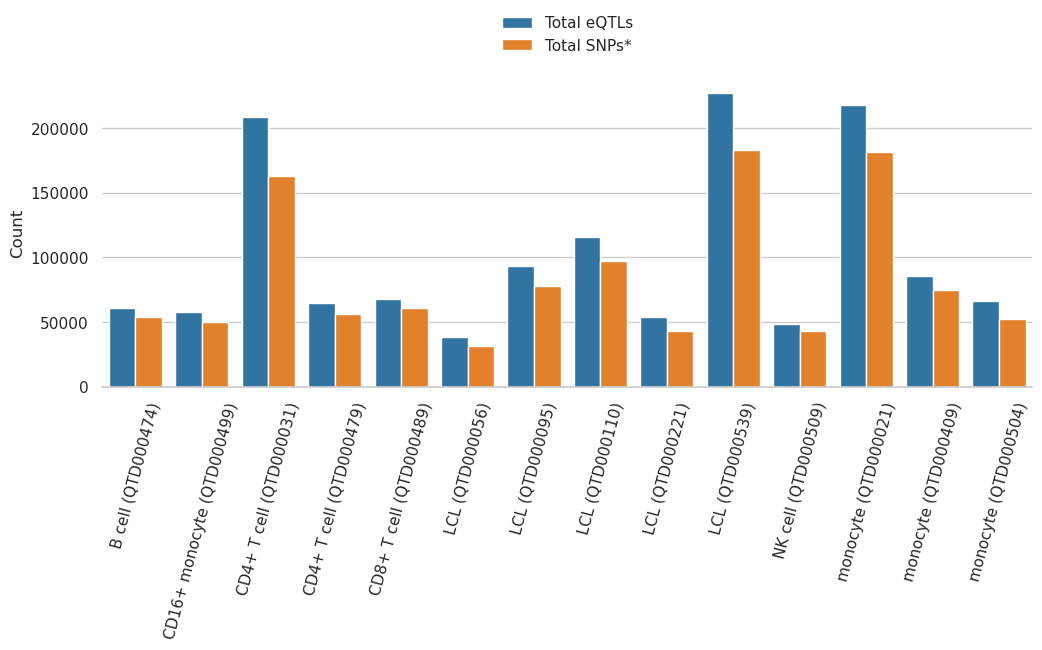

In [30]:
# plot data
fig, ax = plt.subplots(figsize=(12, 4))

# sns.barplot(plot1_data, x='ec_fullname', y='value', hue='variable', ax=ax, order=['CD4+ T cell', 'CD8+ T cell', 'B cell',
#                                                                                         'NK cell', 'monocyte', 'CD16+ monocyte'], palette=sns.color_palette("tab10"))
sns.barplot(plot1_data, x='ec_fullname', y='value', hue='variable', ax=ax, palette=sns.color_palette("tab10"))
# remove left spine
sns.despine(left=True)

# move legend
#sns.move_legend(ax, "upper right", bbox_to_anchor=(1.2, 0.65))
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, 1.25))

# rotate X-Axis Ticks by 45-degrees
ax.tick_params(axis='x', labelrotation = 75)

# set labels
ax.set_xlabel('')
ax.set_ylabel('Count')
legend = ax.legend_
legend.set_title('') 
legend.set_frame_on(False)

outfn = os.path.join(outdir, 'sgl_breakdowns.eqtls_and_snps.png')
fig.savefig(outfn, dpi=600, bbox_inches='tight')

/mnt/BioHome/jreyna/tmp/ipykernel_3151440/1435774856.py:6: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(plot2_data, x='ec_fullname', y='value', hue='variable', ax=ax, palette=sns.color_palette("tab10")[2:])


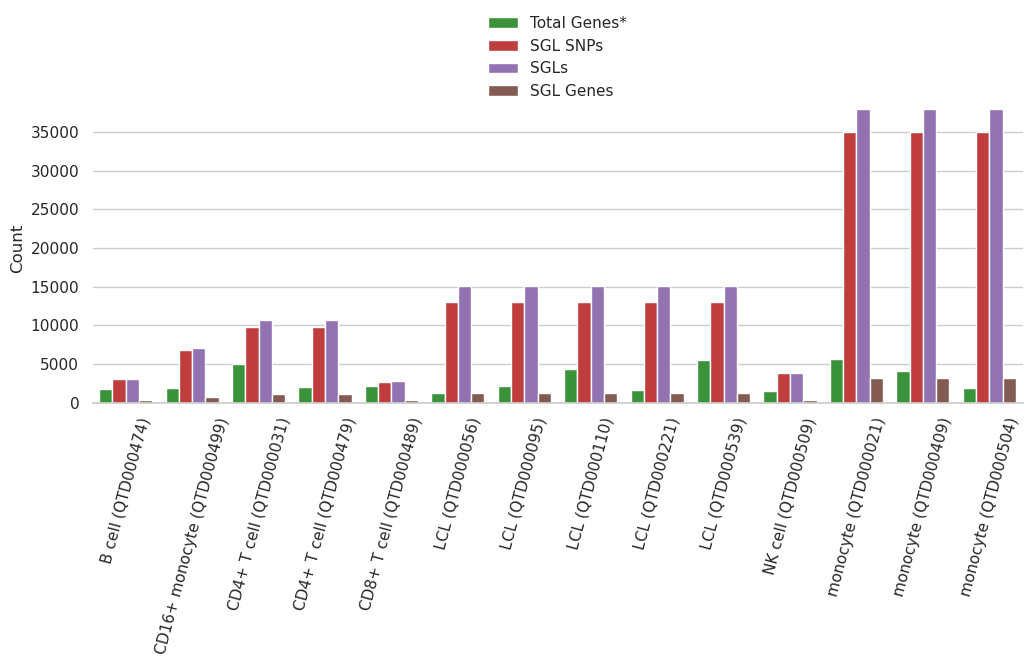

In [31]:
# plot data
fig, ax = plt.subplots(figsize=(12, 4))

# sns.barplot(plot2_data, x='ec_fullname', y='value', hue='variable', ax=ax, order=['CD4+ T cell', 'CD8+ T cell', 'B cell',
#                                                                                         'NK cell', 'monocyte', 'CD16+ monocyte'], palette=sns.color_palette("tab10")[2:])
sns.barplot(plot2_data, x='ec_fullname', y='value', hue='variable', ax=ax, palette=sns.color_palette("tab10")[2:])


# remove left spine
sns.despine(left=True)

# move legend
#sns.move_legend(ax, "upper center", bbox_to_anchor=(1.2, 0.65))
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, 1.3))


# rotate X-Axis Ticks by 45-degrees
ax.tick_params(axis='x', labelrotation = 75)

# set labels
ax.set_xlabel('')
ax.set_ylabel('Count')
legend = ax.legend_
legend.set_title('') 
legend.set_frame_on(False)

outfn = os.path.join(outdir, 'sgl_breakdowns.all_others.png')
fig.savefig(outfn, dpi=600, bbox_inches='tight')

### Saving an Excel Version 

In [32]:
all_df

,chrA_loop,startA_loop,endA_loop,chrB_loop,startB_loop,endB_loop,-log10_qval_loop,chrom_snp,start_snp,end_snp,...,tissue_id,tissue_label,condition_label,sample_size,quant_method,ftp_path,ftp_cs_path,ftp_lbf_path,ec_dataset_name,ec_fullname
0,1,2555000,2560000,1,2575000,2580000,13.075867,1,2575048,2575049,...,EFO_0005292,LCL,naive,148,ge,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,LCL,LCL (QTD000056)
1,1,2555000,2560000,1,2575000,2580000,13.075867,1,2579840,2579841,...,EFO_0005292,LCL,naive,148,ge,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,LCL,LCL (QTD000056)
2,1,2555000,2560000,1,2580000,2585000,11.060238,1,2580533,2580534,...,EFO_0005292,LCL,naive,148,ge,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,LCL,LCL (QTD000056)
3,1,2555000,2560000,1,2580000,2585000,11.060238,1,2580533,2580534,...,EFO_0005292,LCL,naive,148,ge,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,LCL,LCL (QTD000056)
4,1,2555000,2560000,1,2580000,2585000,11.060238,1,2581012,2581013,...,EFO_0005292,LCL,naive,148,ge,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,LCL,LCL (QTD000056)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345072,9,136700000,136705000,9,136725000,136730000,4.719977,9,136704590,136704591,...,CL_0002057,monocyte,naive,191,ge,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,monocyte,monocyte (QTD000021)
345073,9,136700000,136705000,9,136725000,136730000,4.719977,9,136704593,136704594,...,CL_0002057,monocyte,naive,191,ge,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,monocyte,monocyte (QTD000021)
345074,9,136700000,136705000,9,136725000,136730000,4.719977,9,136704595,136704596,...,CL_0002057,monocyte,naive,191,ge,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,monocyte,monocyte (QTD000021)
345075,9,136700000,136705000,9,136725000,136730000,4.719977,9,136704622,136704623,...,CL_0002057,monocyte,naive,191,ge,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,ftp://ftp.ebi.ac.uk/pub/databases/spot/eQTL/su...,monocyte,monocyte (QTD000021)


In [33]:
cols = ['chrA_loop', 'startA_loop', 'endA_loop',
         'chrB_loop', 'startB_loop', 'endB_loop',
         '-log10_qval_loop', 'sample',
         'end_snp', 'gene_name', 'geneid']

new_cols = ['ChrA', 'StartA', 'EndA',
             'ChrB', 'StartB', 'EndB',
             '-log10(Q values)', 'Sample Name',
             'SNP Pos', 'Gene Name', 'Gene ID']
outfn = os.path.join(outdir, 'sgls.supplemental_table.xlsx')
with pd.ExcelWriter(outfn) as fw:
    
    for grp, grp_df in all_df.groupby('ec_fullname'):
        
        print(grp)
        
        tdf = grp_df[cols].sort_values(['sample', 'chrA_loop', 'startA_loop', 'chrB_loop', 'startB_loop', 'end_snp', 'geneid'])
        tdf.loc[:, 'chrA_loop'] = 'chr' + tdf.loc[:, 'chrA_loop'].astype(str)
        tdf.loc[:, 'chrB_loop'] = 'chr' + tdf.loc[:, 'chrB_loop'].astype(str)
        
        tdf.columns = new_cols
        tdf.to_excel(fw, sheet_name=grp, index=False)

B cell (QTD000474)
CD16+ monocyte (QTD000499)
CD4+ T cell (QTD000031)
CD4+ T cell (QTD000479)
CD8+ T cell (QTD000489)
LCL (QTD000056)
LCL (QTD000095)
LCL (QTD000110)
LCL (QTD000221)
LCL (QTD000539)
NK cell (QTD000509)
monocyte (QTD000021)
monocyte (QTD000409)
monocyte (QTD000504)
